<a href="https://colab.research.google.com/github/Nathan2605/-machine-learning-python-template/blob/main/Proyecto_Eda_airbnb_NH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


# Paso 1: Planteamiento del problema y recopilación de datos

In [ ]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

In [ ]:
df= pd.read_csv(url)

In [ ]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Paso 2: Exploración y limpieza de datos

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape

(48895, 16)

- Tenemos 48895 registros, que corresponde a la informacion de 48895 lugares en renta Airbnb en NY en 2019
- Y contamos con 16 columnas, osea 16 elementos de informacion sobre cada Airbnb (nombre, zona, precio, etc.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- 10 variables numericas: id, host_id, latitude, longitud, precio, noches minimas, cantidad de review total, cantidad de review mensual, conteo calculado del listado del host, disponibilidad
- 6 variables categoricas: nombre, nombre del host, grupo de barrio, barrio, tipo de habitacion, fecha ultima review
-fecha de ultima review y cantidad de review mensual tiene mas nan que las demas (10,000 aprox)

**Eliminar duplicados**

In [ ]:
#buscar duplicados
print(df.drop("id", axis = 1).duplicated().sum())
print(df.drop("host_id", axis = 1).duplicated().sum())

0
0


no hay duplicados

**Eliminar información irrelevante**

In [ ]:
#eliminar columnas no necesarias
df.drop(columns=[ 'name', 'last_review'], inplace=True)

eliminas name porque identificaremos los lugares con id, y last review porque no parece relevante

# Paso 3: Análisis de variables univariante

**Variables categoricas**

In [ ]:
df.columns

Index(['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#guardamos los nombres de columnas en listas segun CATEGORICAS o NUMERICAS
num = ['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
cat = ['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood','room_type','availability_365']

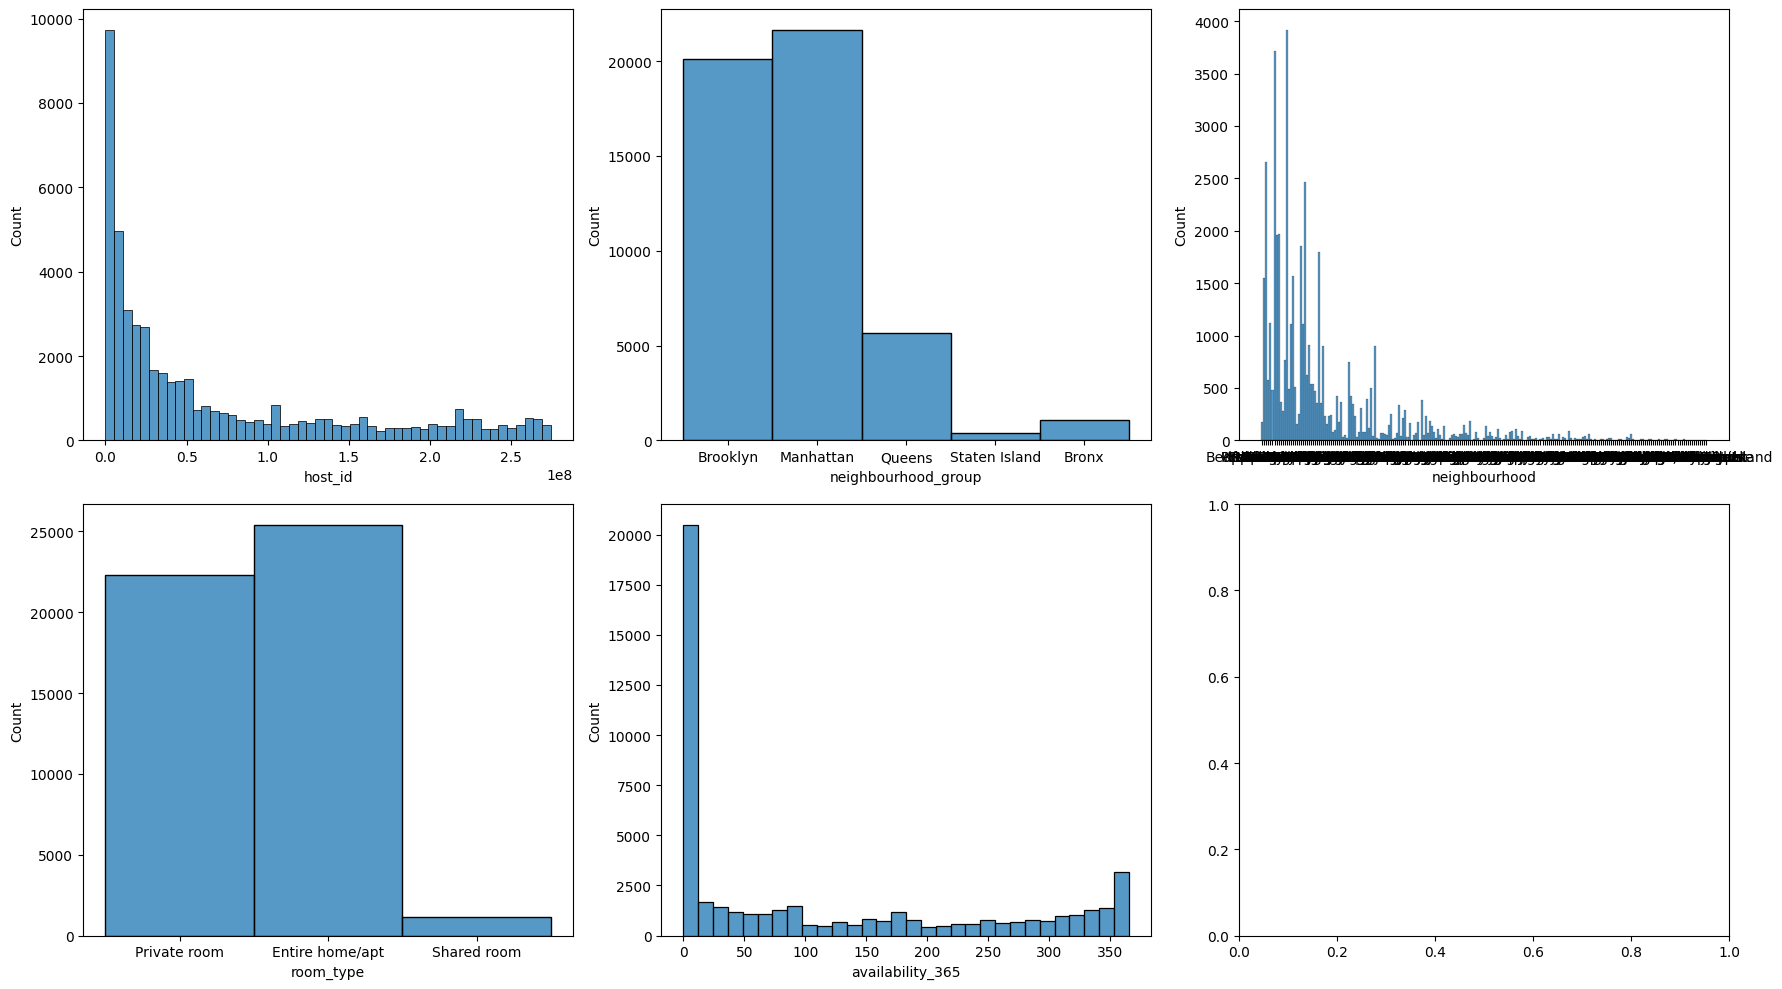

In [ ]:
# Crear la figura y los ejes en una cuadrícula de 2x3
fig, axis = plt.subplots(2, 3, figsize=(18, 10))

# Crear los histogramas en una sola línea de código cada uno
sns.histplot(ax=axis[0, 0], data=df, x="host_id")
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood_group")
sns.histplot(ax=axis[0, 2], data=df, x="neighbourhood")
sns.histplot(ax=axis[1, 0], data=df, x="room_type")
sns.histplot(ax=axis[1, 1], data=df, x="availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [ ]:
df[df['availability_365'] == 0]['availability_365'].value_counts()

availability_365
0    17533
Name: count, dtype: int64

Notamos que:
- Host_id: hay muchos anfitrios que tienen varios lugares en renta
- Neighboorhood_group: vemos que Brooklyn y Mahatan se denotan de manera significativa como las zonas con mayor ofertas.
- Room_type: se ofrecen habitaciones privadas y estancias completas principalemente
- Availability_365: notamos una mayoria en 0, calculamos 17533 elementos con 0 en Availability: ha de ser un error

**Análisis sobre variables numéricas**

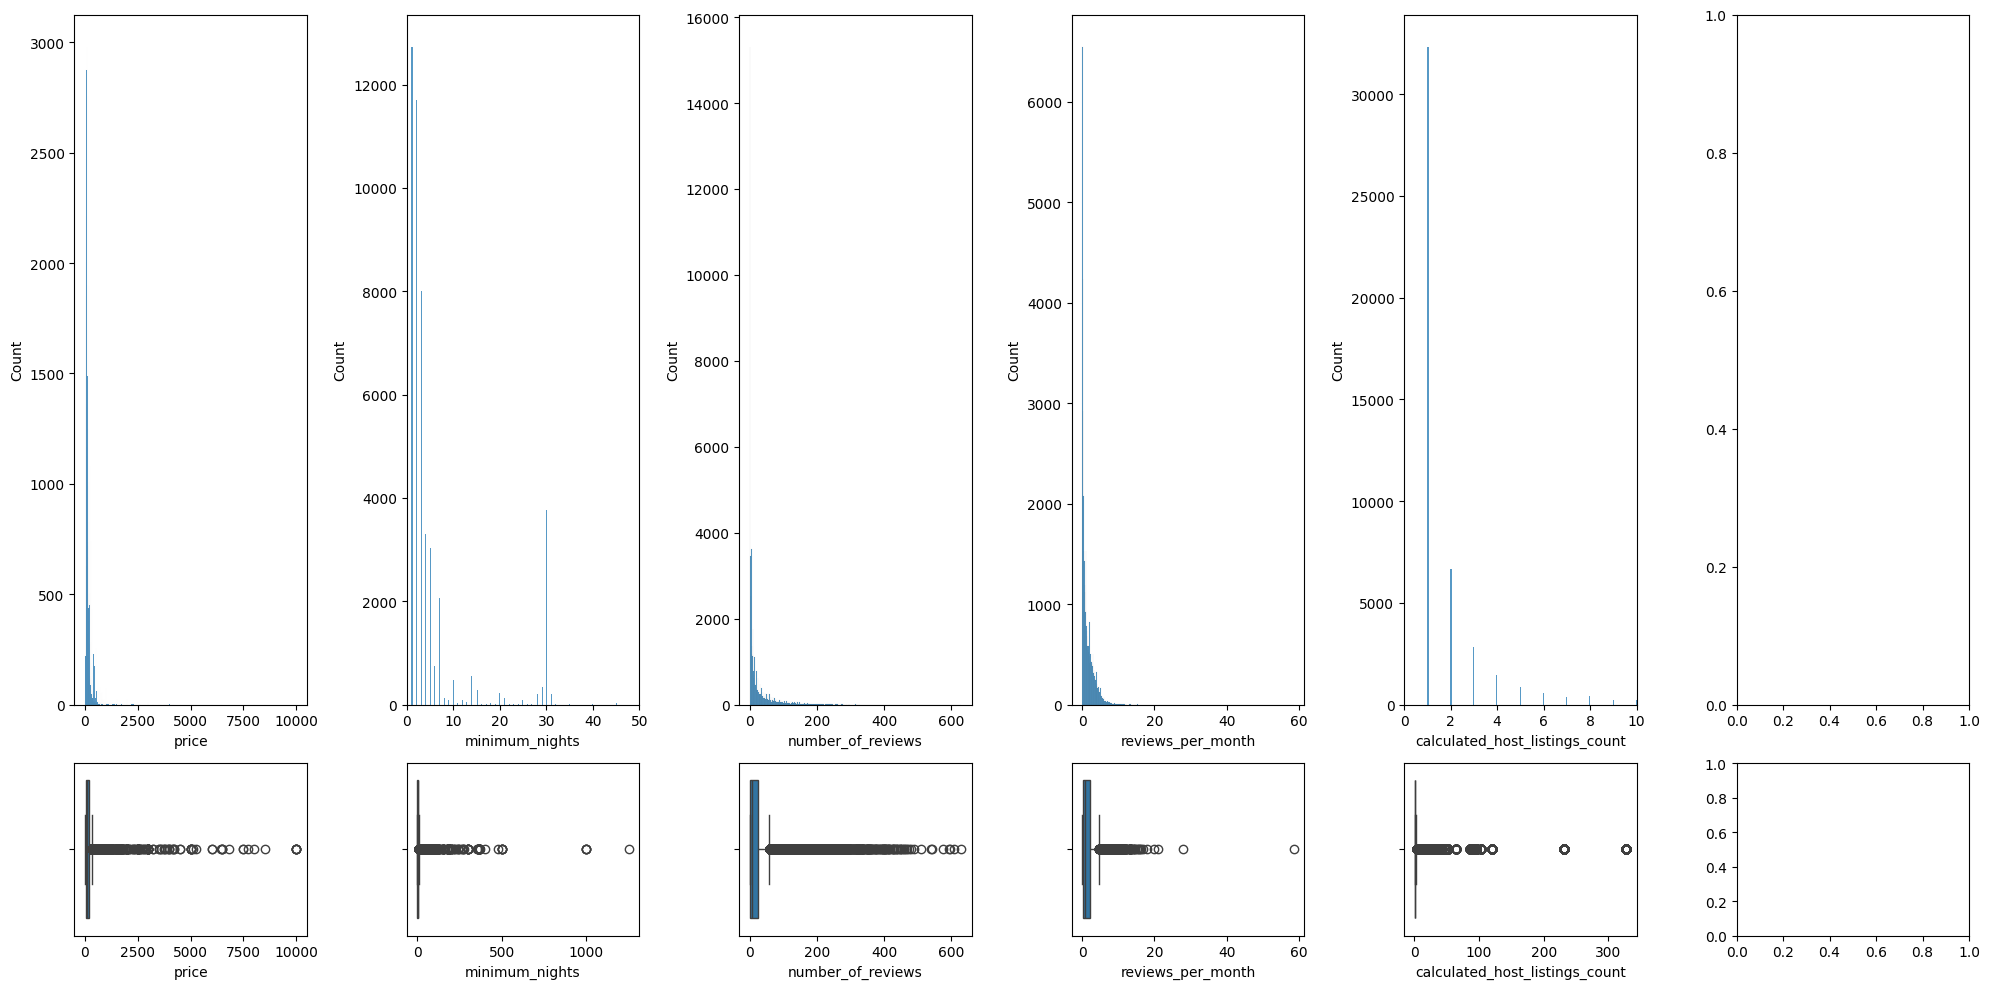

In [ ]:
fig, axis = plt.subplots(2, 6, figsize = (20, 10), gridspec_kw={'height_ratios': [4, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = 'price')
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = 'minimum_nights')
axis[0, 1].set_xlim(0, 50)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df, x = 'number_of_reviews')
sns.boxplot(ax = axis[1, 2], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[0, 3], data = df, x = 'reviews_per_month')
sns.boxplot(ax = axis[1, 3], data = df, x = "reviews_per_month")

sns.histplot(ax = axis[0, 4], data = df, x = 'calculated_host_listings_count')
axis[0, 4].set_xlim(0, 10)
sns.boxplot(ax = axis[1, 4], data = df, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

# Paso 4: Análisis de variables multivariante

**Análisis numérico-numérico**

In [ ]:
df[['price',	'minimum_nights', 'number_of_reviews',	'reviews_per_month', 'calculated_host_listings_count']].corr()['price']

price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
Name: price, dtype: float64

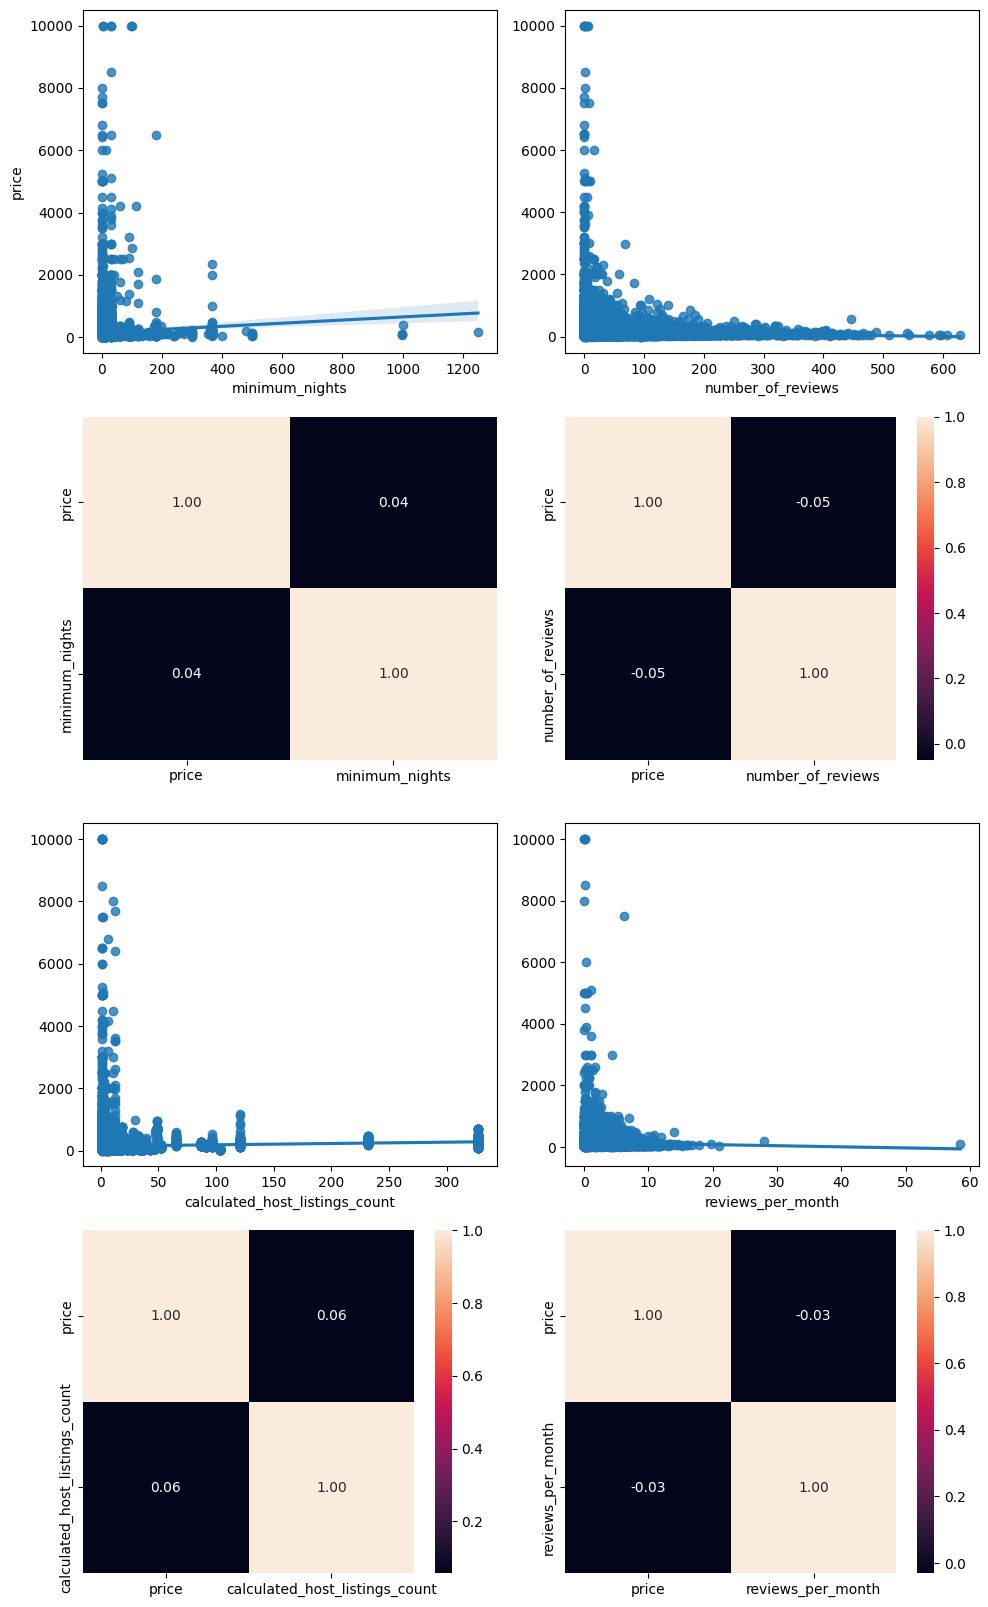

In [ ]:
# Create subplot canvas
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

# Create Plates
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = df, x = "reviews_per_month", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

fig.delaxes(axis[4, 0])
fig.delaxes(axis[4, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Venos que:
- El precio no esta afectado (no correlacion) por Minimum nights
- El precio no esta afectado (no correlacion) por Number of review
- El precio no esta afectado (no correlacion) por Calculated host listing count
- El precio no esta afectado (no correlacion) por reviw per month

**Análisis categórico-categórico**

In [ ]:
num = ['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
cat = ['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood','room_type','availability_365']

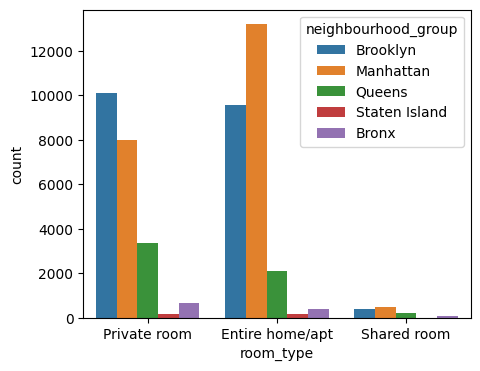

In [ ]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Vemos que:
- En Manhatan se tiende mas a rentarse entire home
- Brooklyn tiende mas ofrecer private room


**Análisis de correlaciones**

In [ ]:
# Factorizamos room type y neighboorhood groups y neighbourhood
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

In [ ]:
#checamos correlacion en general
df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()['price']

neighbourhood_group               0.002672
neighbourhood                    -0.054963
room_type                         0.206027
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.030608
calculated_host_listings_count    0.057472
availability_365                  0.081829
Name: price, dtype: float64

In [ ]:
#checamos las medias de precio respecto a room type
df.groupby(by='room_type')['price'].mean()

room_type
0     89.780973
1    211.794246
2     70.127586
Name: price, dtype: float64

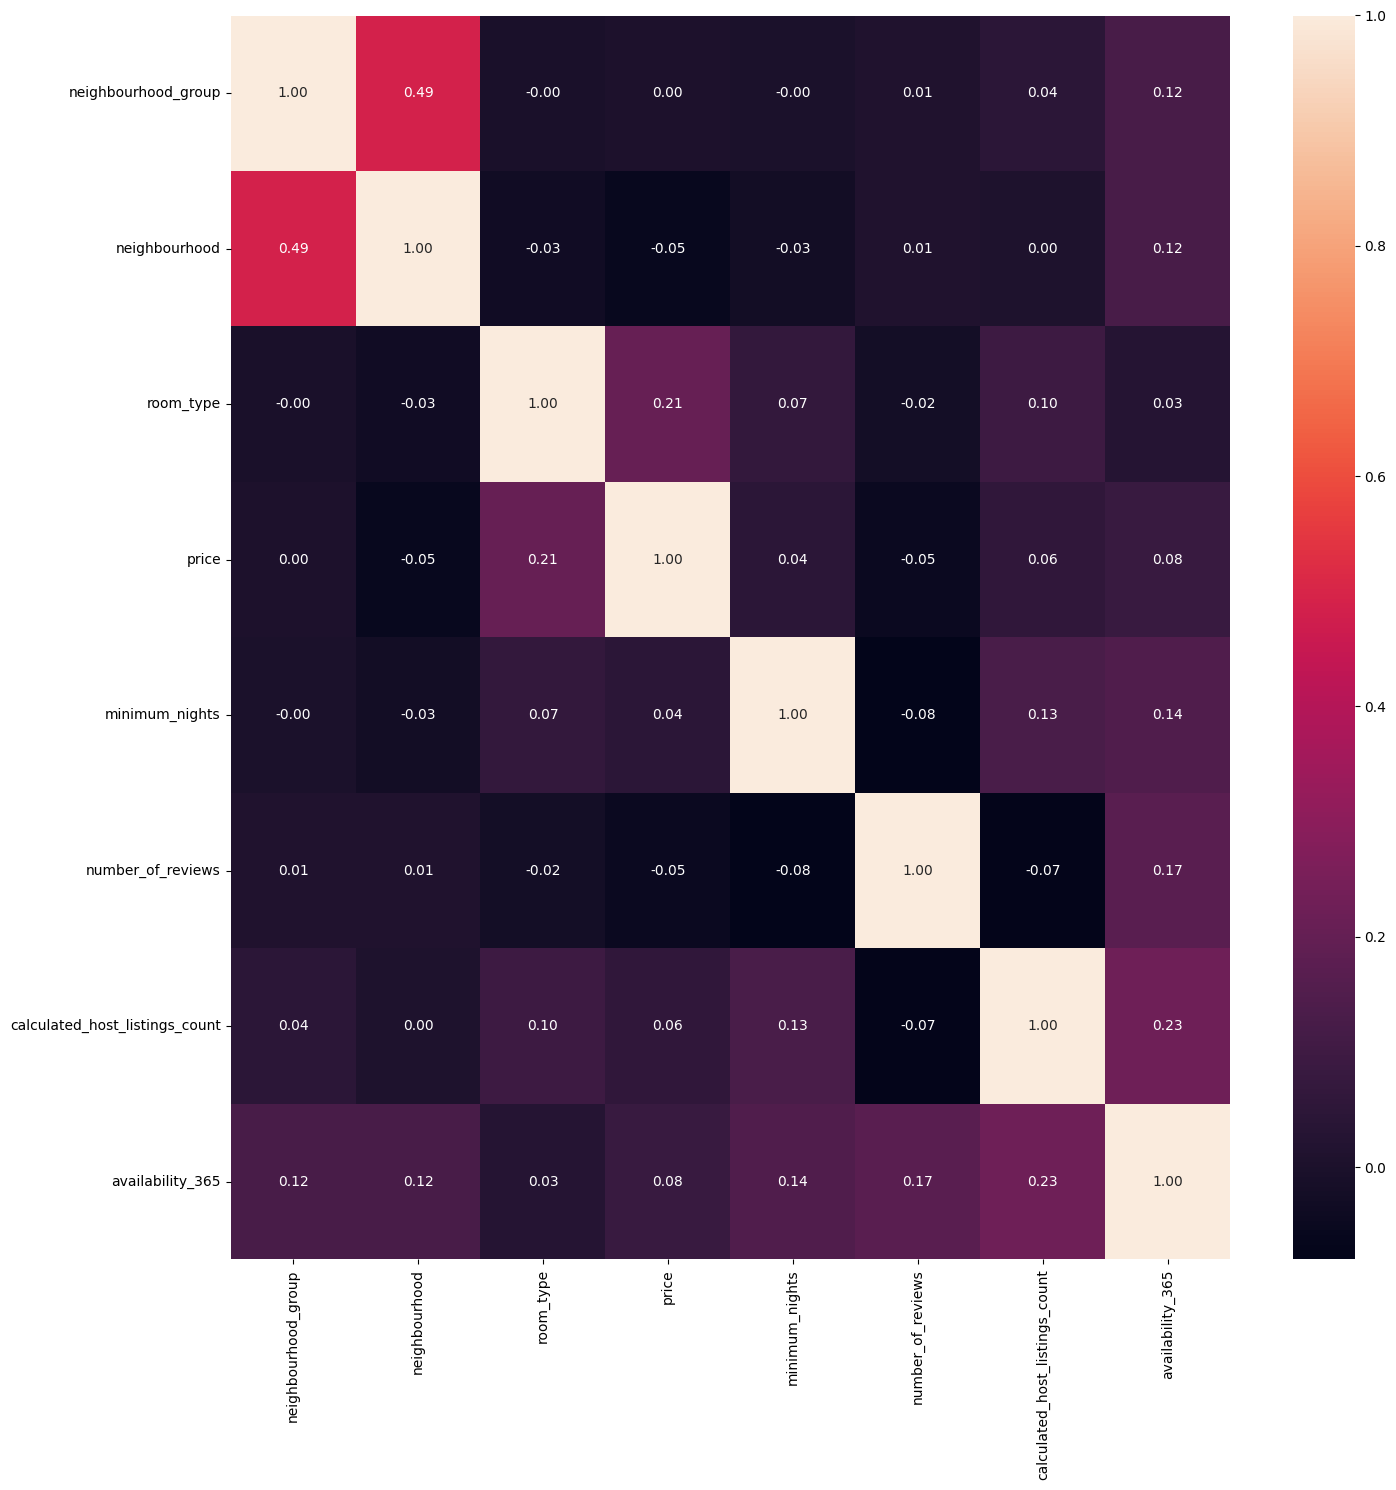

In [ ]:
#hacemos un mapa
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Notamos que, hay 2 valores que demuestran correlacion, y permiten afirmar que:
1. El precio es mayor para Entire home
2. Los lugares con mayor Availability tiene mayor review



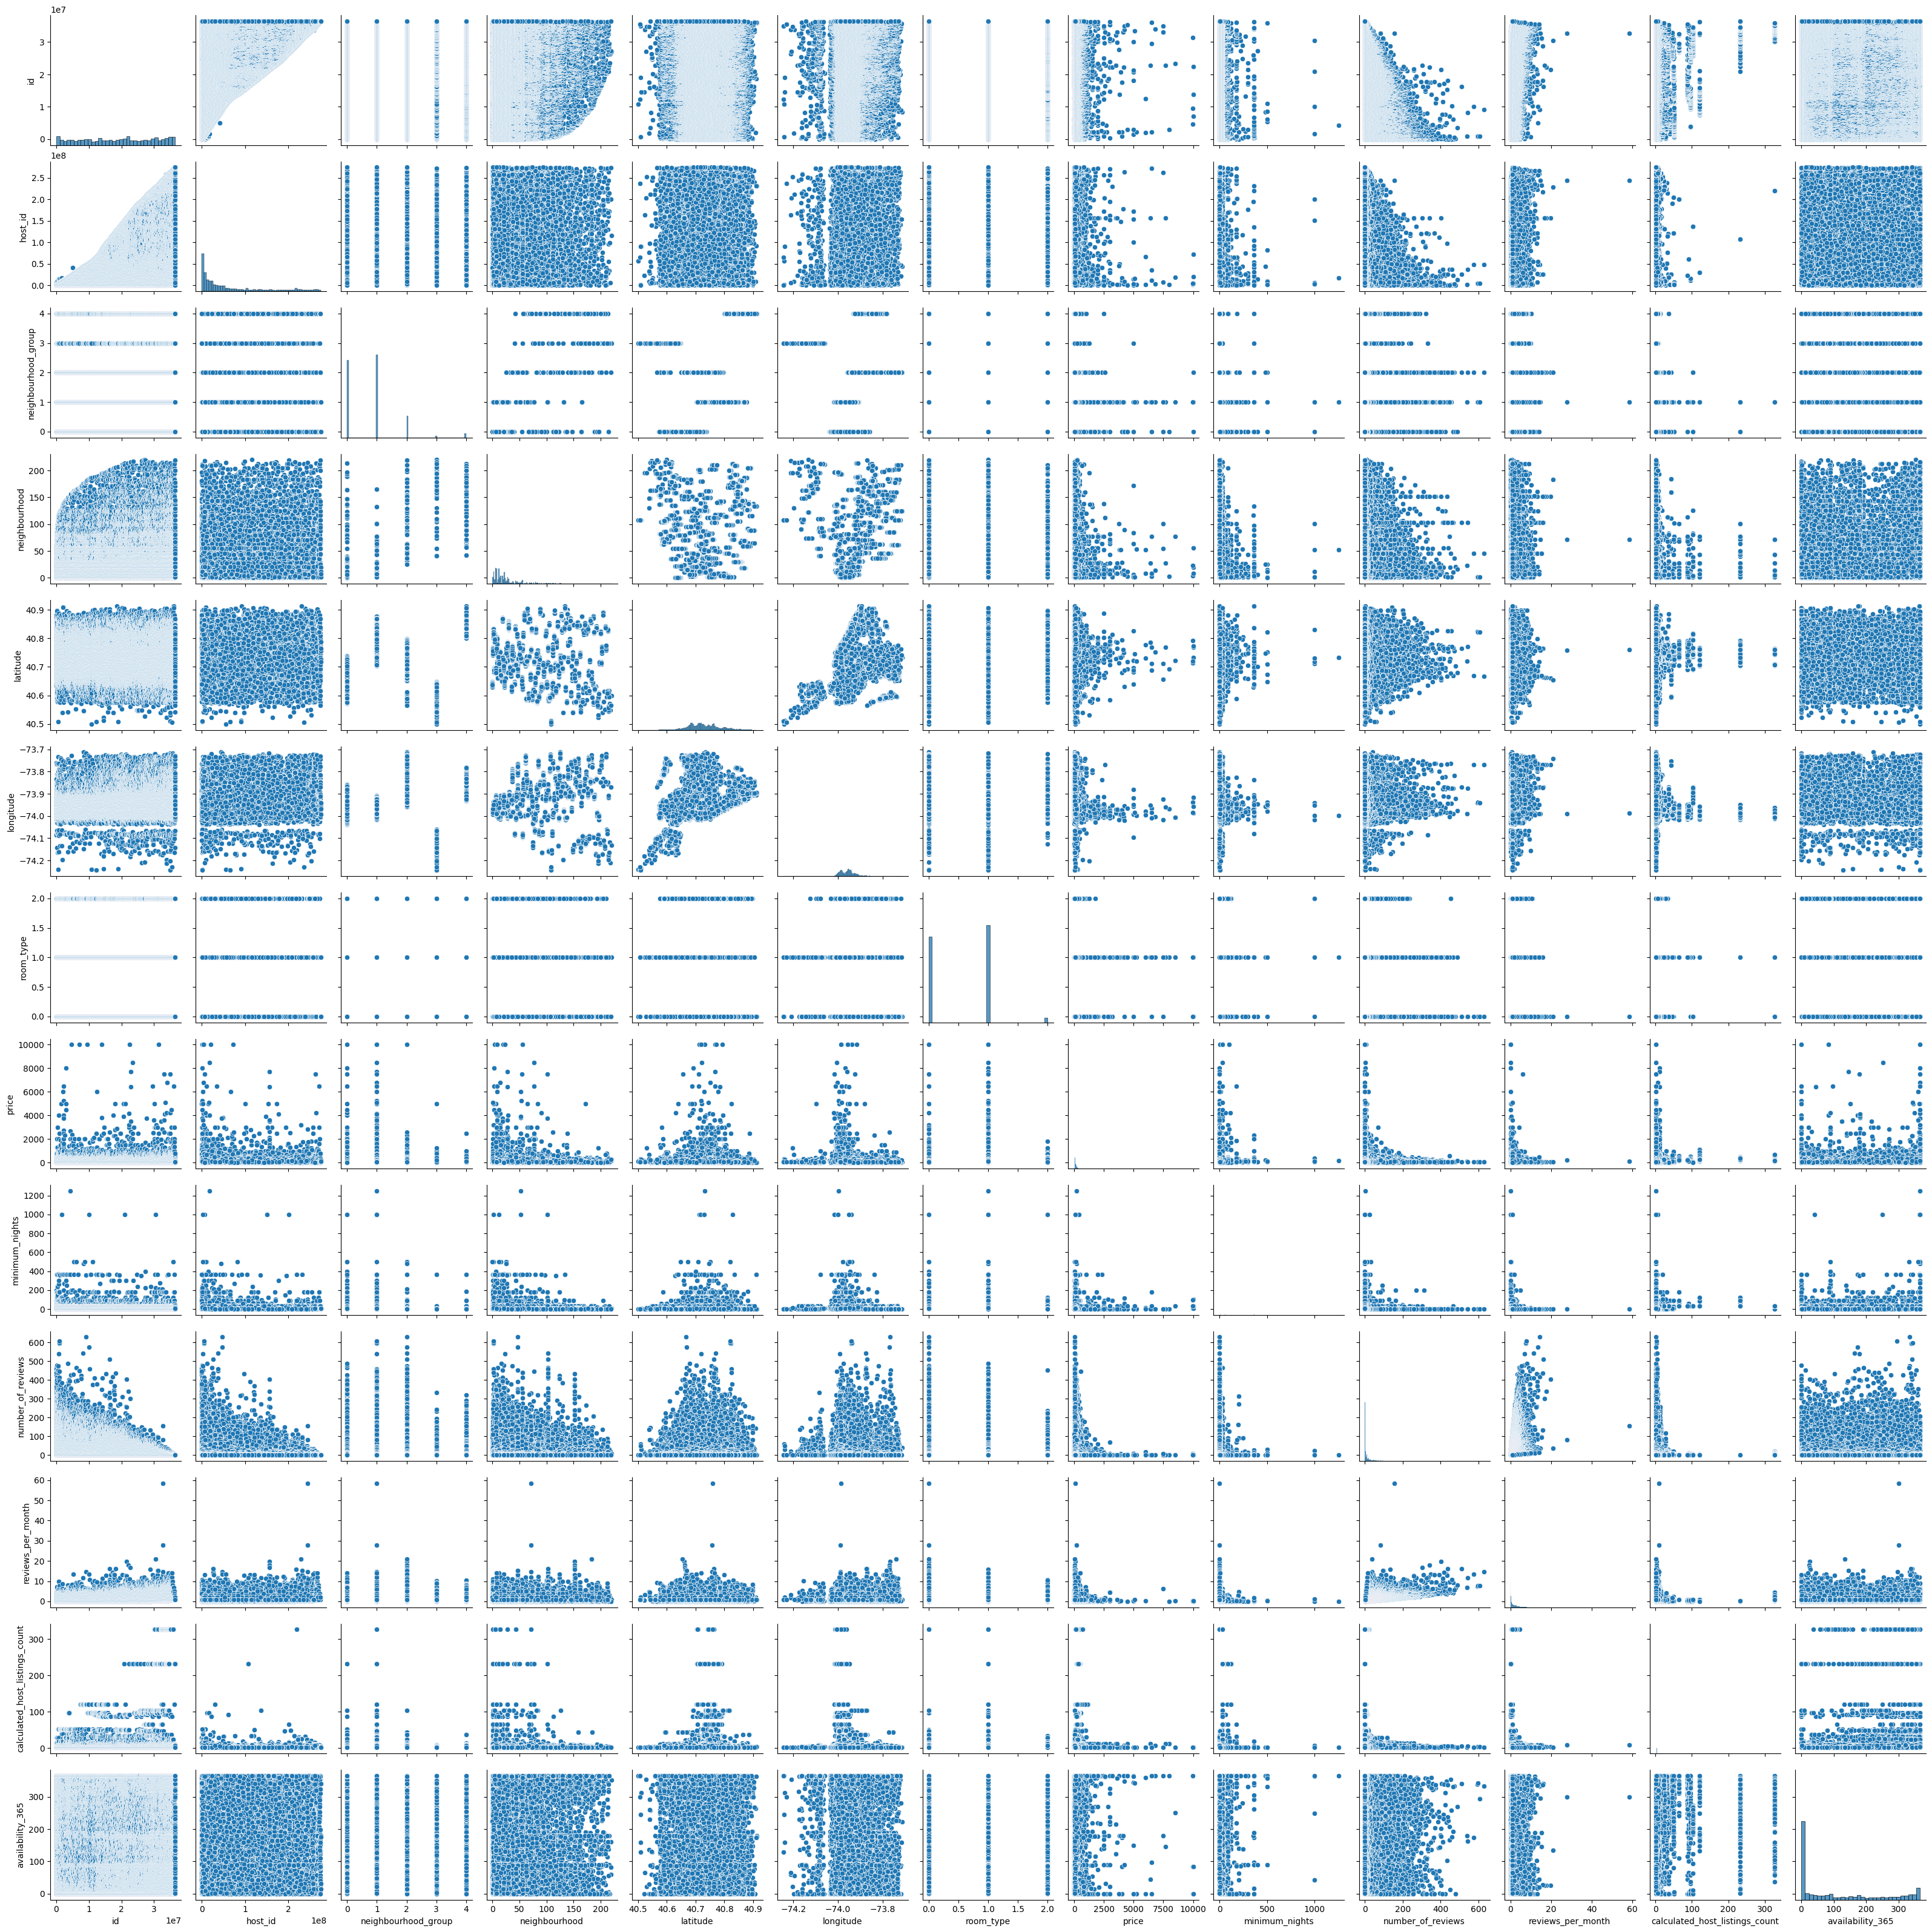

In [ ]:
#hacemos un pairplot
sns.pairplot(data = df)

# Paso 5: Ingeniería de características

**Analisis de outlier**

In [ ]:
df.describe()

id       host_id  neighbourhood_group  neighbourhood  \
count  4.889500e+04  4.889500e+04         48895.000000   48895.000000   
mean   1.901714e+07  6.762001e+07             0.786911      29.888782   
std    1.098311e+07  7.861097e+07             0.844386      34.676634   
min    2.539000e+03  2.438000e+03             0.000000       0.000000   
25%    9.471945e+06  7.822033e+06             0.000000       7.500000   
50%    1.967728e+07  3.079382e+07             1.000000      19.000000   
75%    2.915218e+07  1.074344e+08             1.000000      37.000000   
max    3.648724e+07  2.743213e+08             4.000000     220.000000   

           latitude     longitude     room_type         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170      0.567113    152.720687        7.029962   
std        0.054530      0.046157      0.541249    240.154170       20.510550   
min       40.499790    -74.244420      0.000000      0.000000        1.000000   
25%       40.690100    -73.983070      0.000000     69.000000        1.000000   
50%       40.723070    -73.955680      1.000000    106.000000        3.000000   
75%       40.763115    -73.936275      1.000000    175.000000        5.000000   
max       40.913060    -73.712990      2.000000  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

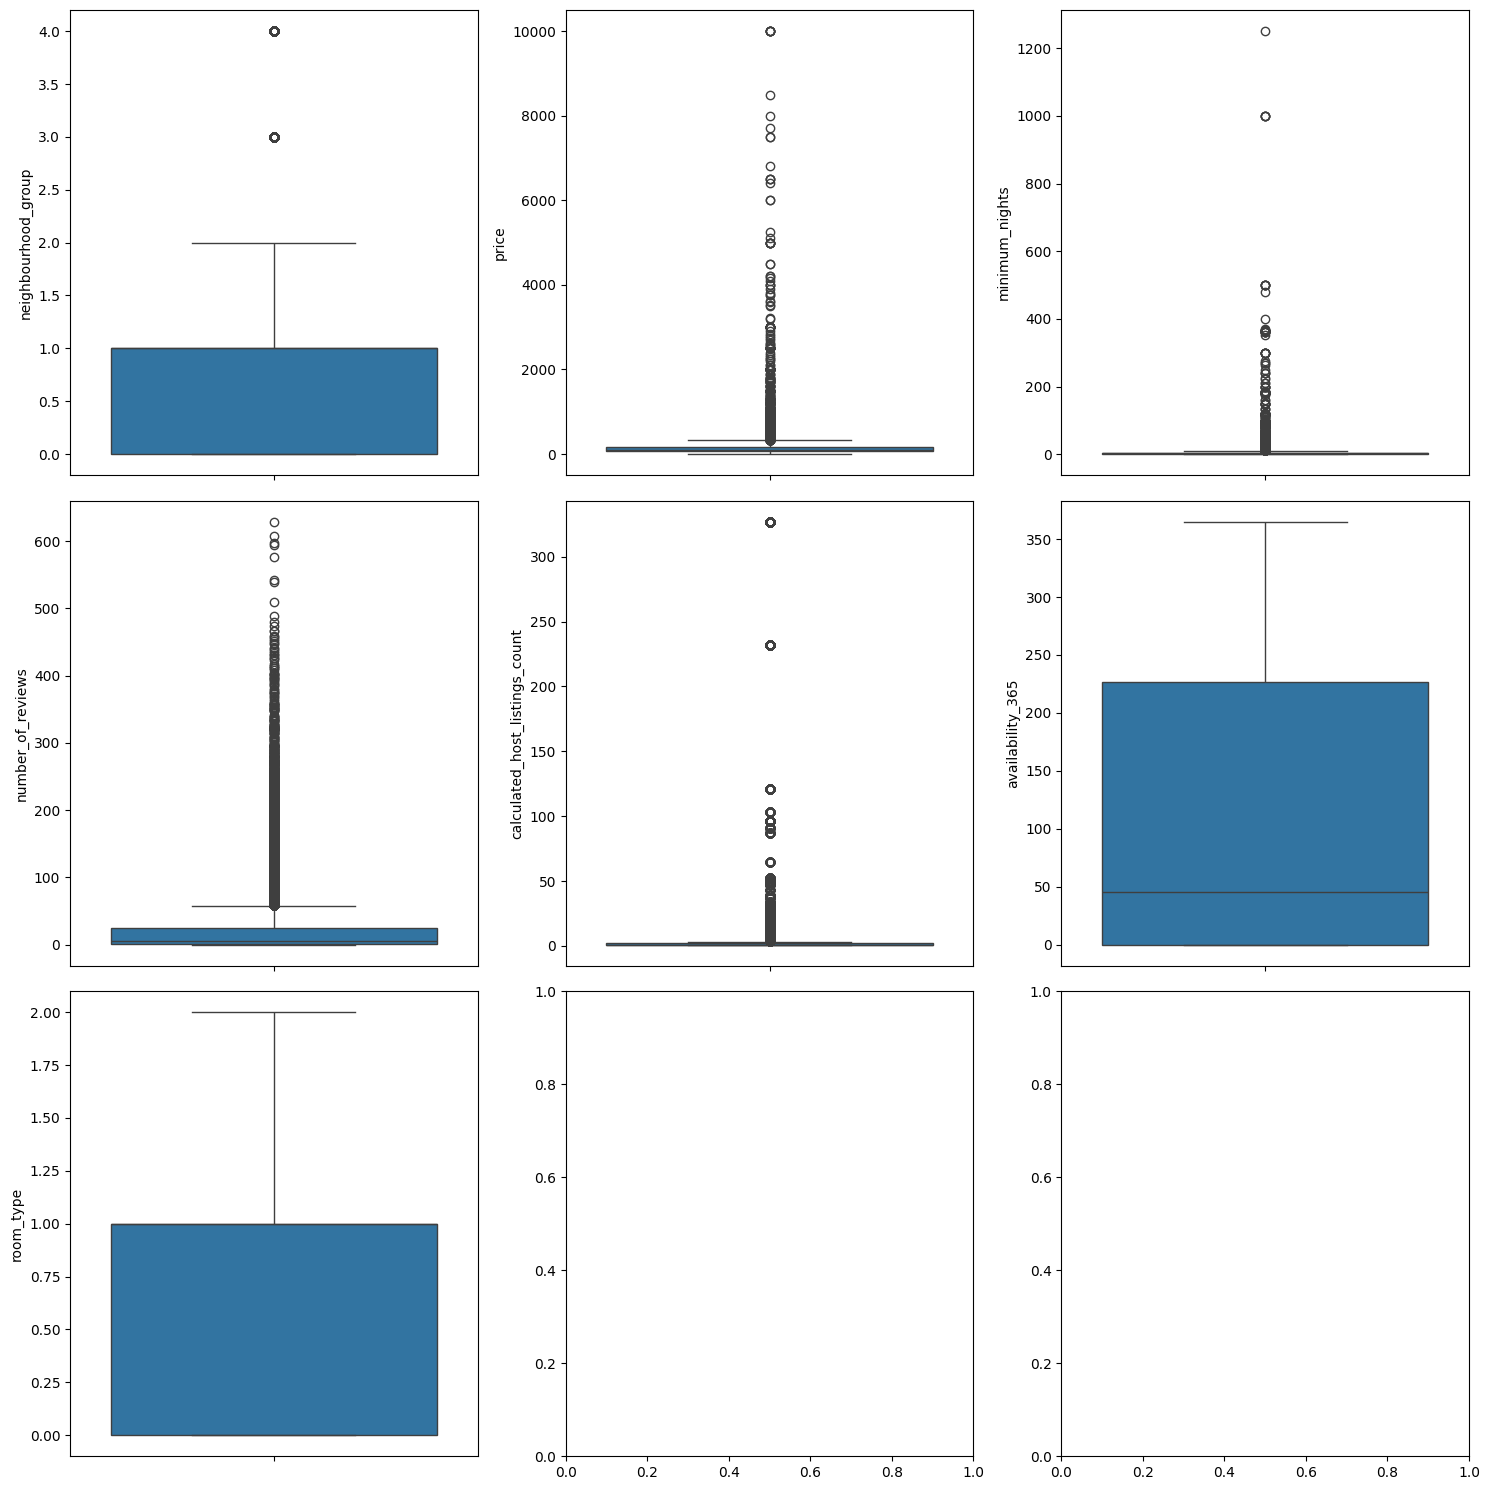

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [ ]:
#analisis de precios
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# Rango intercuantil para precio
rango_intercuantil = price_stats["75%"] - price_stats["25%"]
limite_sup = price_stats["75%"] + 1.5 * rango_intercuantil #multiplicar por 1.5 para obtener para obtener 2 std
limite_inf = price_stats["25%"] - 1.5 * rango_intercuantil

print(f"Limite superiror: {limite_sup}\nLimite inferior: {limite_inf}\nRango interquantil {rango_intercuantil}")

Limite superiror: 334.0
Limite inferior: -90.0
Rango interquantil 106.0


In [ ]:
var = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

In [ ]:
#hagamoslo para las variables de interes
for col in var:
  stats = df[col].describe()
  rango_intercuantil = stats["75%"] - stats["25%"]
  limite_sup = stats["75%"] + 1.5 * rango_intercuantil
  limite_inf = stats["25%"] - 1.5 * rango_intercuantil
  print(f"\n{str(col).upper()}\nLimite superiror: {limite_sup}\nLimite inferior: {limite_inf}\nRango interquantil {rango_intercuantil}")


PRICE
Limite superiror: 334.0
Limite inferior: -90.0
Rango interquantil 106.0

MINIMUM_NIGHTS
Limite superiror: 11.0
Limite inferior: -5.0
Rango interquantil 4.0

NUMBER_OF_REVIEWS
Limite superiror: 58.5
Limite inferior: -33.5
Rango interquantil 23.0

CALCULATED_HOST_LISTINGS_COUNT
Limite superiror: 3.5
Limite inferior: -0.5
Rango interquantil 1.0


In [ ]:
#limpiamos en base a lo anterior
df = df[df["price"] > 0]
df = df[df["minimum_nights"] <= 15]
df = df[df["calculated_host_listings_count"] > 4]

**Análisis de valores faltantes**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 442
id                                  0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False) / len(df)

reviews_per_month                 0.149476
id                                0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

las variables principales no tienen Nan

**Escalado Mínimo-Máximo**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
0            0.016575        0.000000                        0.003106   
21           0.239411        0.071429                        0.003106   
22           0.071823        0.000000                        0.003106   
23           0.130755        0.071429                        0.003106   
92           0.029466        0.428571                        0.003106   

    availability_365  neighbourhood_group  room_type  price  
0           1.000000                  0.0        0.0    149  
21          0.950685                  0.0        0.0    130  
22          0.997260                  0.0        0.0     80  
23          0.832877                  0.0        0.0    110  
92          0.506849                  0.0        0.0     98

# Paso 6: Selección de características

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

minimum_nights  calculated_host_listings_count  availability_365  room_type
0        0.000000                        0.000000          0.846575        0.0
1        0.071429                        1.000000          0.169863        0.5
2        0.071429                        0.000000          1.000000        0.0
3        0.428571                        0.130435          0.926027        0.0
4        0.071429                        1.000000          0.778082        0.5